<a href="https://colab.research.google.com/github/Emtiaz-pro/CVPR/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Extract the image and keep it in a numpyarray


 Catagory of this folder : ['dogs', 'cats', 'panda'] 
dogs
cats
panda


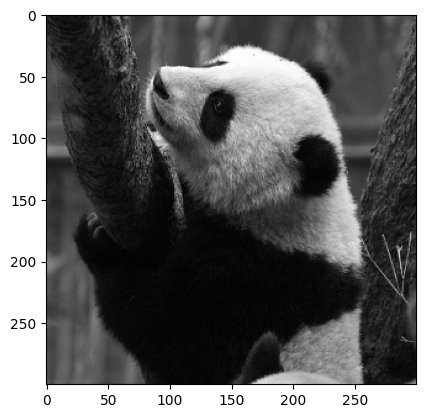

In [14]:
import os  # to read all this file
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm
import math

catagory = os.listdir('/content/drive/MyDrive/CVPR Dataset/animals')  # supplies folder location and prints what is there
print(f' Catagory of this folder : {catagory} ')

for c in catagory:
    path = os.path.join('/content/drive/MyDrive/CVPR Dataset/animals', c)
    print(c)
    i = 0
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))

        plt.imshow(cv2.resize(cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY), (300, 300)), cmap='gray')


# processing Data

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm

process_data = []

catagory = os.listdir('/content/drive/MyDrive/CVPR Dataset/animals')
print(f'Catagory of this folder : {catagory}')

for c in catagory:
    path = os.path.join('/content/drive/MyDrive/CVPR Dataset/animals', c)
    class_num = catagory.index(c)
    print(c)
    for img in tqdm(os.listdir(path)):
        img_array = cv2.imread(os.path.join(path, img))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
        img_array = cv2.resize(img_array, (80, 80))
        process_data.append([img_array, class_num])
        # print([img_array, class_num])

print(f"Total number of images in all categories: {len(process_data)}")


Catagory of this folder : ['dogs', 'cats', 'panda']
dogs


100%|██████████| 100/100 [00:00<00:00, 112.12it/s]


cats


100%|██████████| 100/100 [00:00<00:00, 103.58it/s]


panda


100%|██████████| 100/100 [00:01<00:00, 82.81it/s]

Total number of images in all categories: 300


# Checking if it shows correct images

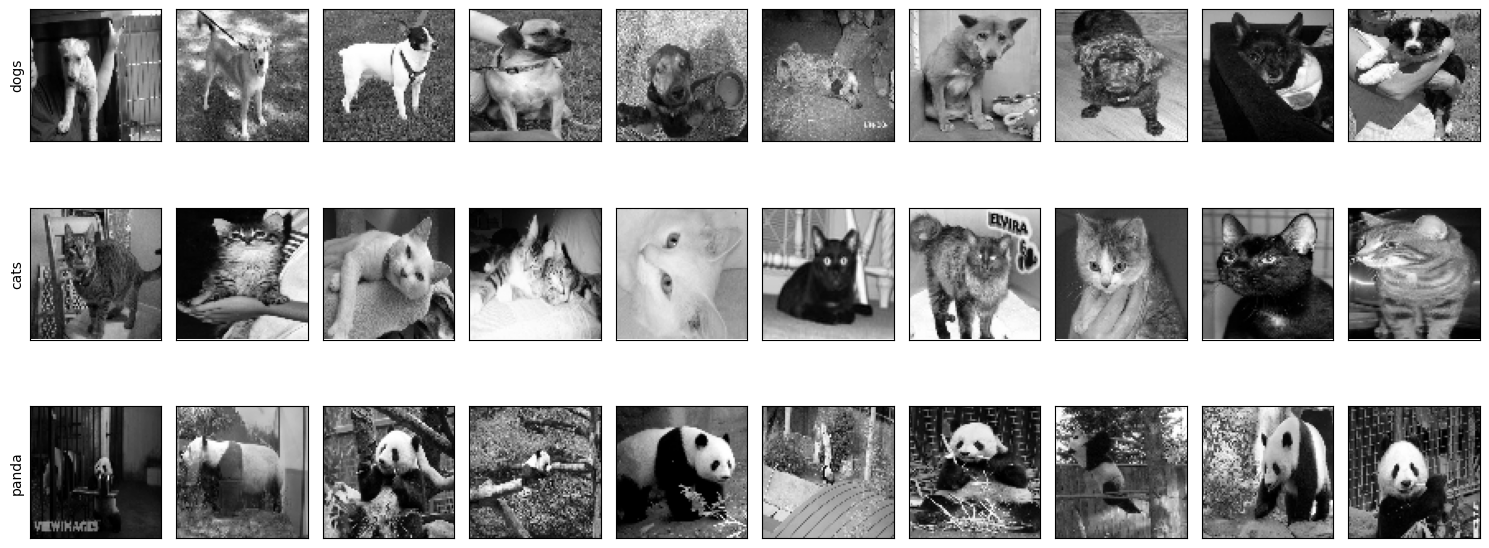

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

catagory = os.listdir('/content/drive/MyDrive/CVPR Dataset/animals')

plt.figure(figsize=(15, 20))
i = 0

for c in catagory:
    path = os.path.join('/content/drive/MyDrive/CVPR Dataset/animals', c)
    for img_file in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img_file))
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img_array = cv2.resize(img_array, (80, 80))
        plt.subplot(10, 10, i + 1)
        plt.imshow(img_array, cmap='gray')
        if i % 10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i % 10 == 0:
            break

plt.tight_layout()
plt.show()


# Rechecking with shuffled images

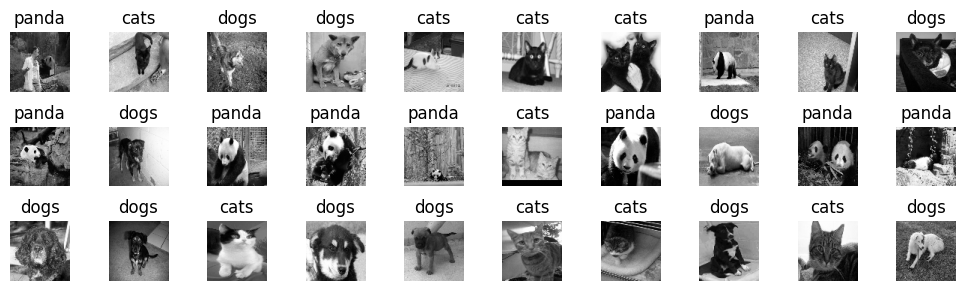

In [15]:
import random
import matplotlib.pyplot as plt

random.shuffle(process_data)

plt.figure(figsize=(10, 3))

for i in range(30):
    plt.subplot(3, 10, i + 1)
    plt.imshow(process_data[i][0], cmap='gray')  # Show the grayscale image
    plt.title(catagory[process_data[i][1]])      # Use label to show category name
    plt.axis('off')

plt.tight_layout()
plt.show()


# Create Folds

In [33]:
f1 = process_data[0:100]
f2 = process_data[100:200]
f3 = process_data[200:300]

# Formula of Euclidian Distance

In [34]:
def calc_l2_distance(x1, x2):
    return np.sqrt(np.sum(np.abs(x1 - x2)**2))

# calc_distance will return list of euclidian distance of top 30 neighbors

In [35]:
def calc_fold_distances(train, val, k_max):
    fold_distances = []
    for v in tqdm(val):
        distances = []
        for t in train:
            dist = calc_l2_distance(v[0], t[0])
            distances.append((t[1], dist))
        distances.sort(key=lambda x: x[1])
        fold_distances.append(distances[:k_max])
    return fold_distances

# calculating L2 distances between validation samples and training samples for each fold, and stores the results

In [38]:
folds = [f1, f2, f3]
fold_distances = []

for i in range(len(folds)):
    # Set 1 fold as validation, and combine the other 2 as training
    validation = folds[i]
    train = sum(folds[:i] + folds[i+1:], [])

    print(f"\nFold {i+1}:")
    fold_distance = calc_fold_distances(train, validation, 30)

    fold_distances.append(fold_distance)

print(fold_distances)



Fold 1:


100%|██████████| 100/100 [00:00<00:00, 203.09it/s]



Fold 2:


100%|██████████| 100/100 [00:00<00:00, 199.25it/s]



Fold 3:


100%|██████████| 100/100 [00:00<00:00, 181.92it/s]

[[[(0, np.float64(790.9930467456714)), (1, np.float64(795.3100024518741)), (0, np.float64(796.1658118758932)), (1, np.float64(800.5279507924755)), (0, np.float64(800.9001186165476)), (0, np.float64(801.8946314822166)), (1, np.float64(802.552178989005)), (0, np.float64(802.7677123551993)), (0, np.float64(803.7655130695767)), (2, np.float64(804.5365125337694)), (0, np.float64(804.6023862753577)), (0, np.float64(805.954713367941)), (2, np.float64(807.2217786952976)), (1, np.float64(807.615626396617)), (2, np.float64(807.7623412860988)), (0, np.float64(808.3792426825419)), (0, np.float64(808.5950778974603)), (0, np.float64(808.9505547312518)), (1, np.float64(808.9888750780199)), (1, np.float64(809.1767421274538)), (1, np.float64(809.3608589498259)), (1, np.float64(809.4868745075488)), (1, np.float64(810.4998457741988)), (1, np.float64(811.0080147569444)), (0, np.float64(811.0634993636442)), (2, np.float64(811.6107441378533)), (1, np.float64(811.6316898692411)), (2, np.float64(813.114383097

# We’ll use a loop to perform cross-validation. In each iteration, one fold is treated as the validation set, while the remaining folds are combined to create the training set.
For each sample in the validation set, we calculate the L2 distance between it and all the samples in the training set.
We sort these distances and pick the K -nearest neighbors to predict the label for the validation sample.
After going through all the samples in the validation set, we calculate the accuracy for the current value of K and save it.
At the end of the iteration, we calculate the midpoint accuracy for the fold (the average of the minimum and maximum accuracy for all K values) and store it.

At end of the process, we’ll have an array of midpoint accuracies for all folds and another array storing the accuracies for different K -values in each fold.

In [39]:
K = list(range(1, 31))  # K values from 1 to 30

folds = [f1, f2, f3]  # Your 3 folds
Folder_accuracies = [[] for _ in folds]
M_P_A_l2 = []

for i, validation in enumerate(folds):
    train = sum(folds[:i] + folds[i+1:], [])  # Combine all other folds as training
    fold_accuracies = []

    for k in K:
        correct_predictions = 0

        for v in tqdm(validation):
            # Calculate L2 distances
            distances = [(calc_l2_distance(v[0], t[0]), t[1]) for t in train]
            distances.sort(key=lambda x: x[0])  # Sort by distance

            # Pick top-K neighbors and predict majority label
            top_k_labels = [distances[j][1] for j in range(k)]
            pred_label = max(set(top_k_labels), key=top_k_labels.count)

            if pred_label == v[1]:
                correct_predictions += 1

        accuracy = correct_predictions / len(validation) * 100
        fold_accuracies.append(accuracy)
        print(f"Fold {i+1}, K = {k}: Accuracy = {accuracy:.2f}%")

    Folder_accuracies[i] = fold_accuracies
    M_P_A_l2.append((min(fold_accuracies) + max(fold_accuracies)) / 2)

# Final average accuracy across folds for each K
average_midpoints = []
for k in range(len(K)):
    accuracies_at_k = [fold[k] for fold in Folder_accuracies]
    average_midpoints.append(np.mean(accuracies_at_k))


100%|██████████| 100/100 [00:00<00:00, 287.25it/s]


Fold 1, K = 1: Accuracy = 39.00%


100%|██████████| 100/100 [00:00<00:00, 297.32it/s]


Fold 1, K = 2: Accuracy = 37.00%


100%|██████████| 100/100 [00:00<00:00, 286.00it/s]


Fold 1, K = 3: Accuracy = 39.00%


100%|██████████| 100/100 [00:00<00:00, 288.15it/s]


Fold 1, K = 4: Accuracy = 36.00%


100%|██████████| 100/100 [00:00<00:00, 299.88it/s]


Fold 1, K = 5: Accuracy = 37.00%


100%|██████████| 100/100 [00:00<00:00, 283.24it/s]


Fold 1, K = 6: Accuracy = 39.00%


100%|██████████| 100/100 [00:00<00:00, 289.92it/s]


Fold 1, K = 7: Accuracy = 38.00%


100%|██████████| 100/100 [00:00<00:00, 295.77it/s]


Fold 1, K = 8: Accuracy = 37.00%


100%|██████████| 100/100 [00:00<00:00, 283.59it/s]


Fold 1, K = 9: Accuracy = 39.00%


100%|██████████| 100/100 [00:00<00:00, 288.02it/s]


Fold 1, K = 10: Accuracy = 39.00%


100%|██████████| 100/100 [00:00<00:00, 302.94it/s]


Fold 1, K = 11: Accuracy = 37.00%


100%|██████████| 100/100 [00:00<00:00, 282.10it/s]


Fold 1, K = 12: Accuracy = 41.00%


100%|██████████| 100/100 [00:00<00:00, 291.70it/s]


Fold 1, K = 13: Accuracy = 42.00%


100%|██████████| 100/100 [00:00<00:00, 301.19it/s]


Fold 1, K = 14: Accuracy = 42.00%


100%|██████████| 100/100 [00:00<00:00, 265.90it/s]


Fold 1, K = 15: Accuracy = 41.00%


100%|██████████| 100/100 [00:00<00:00, 146.09it/s]


Fold 1, K = 16: Accuracy = 42.00%


100%|██████████| 100/100 [00:00<00:00, 277.68it/s]


Fold 1, K = 17: Accuracy = 43.00%


100%|██████████| 100/100 [00:00<00:00, 215.70it/s]


Fold 1, K = 18: Accuracy = 46.00%


100%|██████████| 100/100 [00:00<00:00, 191.10it/s]


Fold 1, K = 19: Accuracy = 43.00%


100%|██████████| 100/100 [00:00<00:00, 211.91it/s]


Fold 1, K = 20: Accuracy = 50.00%


100%|██████████| 100/100 [00:00<00:00, 188.21it/s]


Fold 1, K = 21: Accuracy = 50.00%


100%|██████████| 100/100 [00:00<00:00, 194.35it/s]


Fold 1, K = 22: Accuracy = 51.00%


100%|██████████| 100/100 [00:00<00:00, 202.82it/s]


Fold 1, K = 23: Accuracy = 49.00%


100%|██████████| 100/100 [00:00<00:00, 193.51it/s]


Fold 1, K = 24: Accuracy = 48.00%


100%|██████████| 100/100 [00:00<00:00, 184.72it/s]


Fold 1, K = 25: Accuracy = 47.00%


100%|██████████| 100/100 [00:00<00:00, 287.68it/s]


Fold 1, K = 26: Accuracy = 44.00%


100%|██████████| 100/100 [00:00<00:00, 301.32it/s]


Fold 1, K = 27: Accuracy = 45.00%


100%|██████████| 100/100 [00:00<00:00, 292.13it/s]


Fold 1, K = 28: Accuracy = 45.00%


100%|██████████| 100/100 [00:00<00:00, 285.12it/s]


Fold 1, K = 29: Accuracy = 47.00%


100%|██████████| 100/100 [00:00<00:00, 289.14it/s]


Fold 1, K = 30: Accuracy = 43.00%


100%|██████████| 100/100 [00:00<00:00, 258.81it/s]


Fold 2, K = 1: Accuracy = 42.00%


100%|██████████| 100/100 [00:00<00:00, 247.84it/s]


Fold 2, K = 2: Accuracy = 37.00%


100%|██████████| 100/100 [00:00<00:00, 190.80it/s]


Fold 2, K = 3: Accuracy = 37.00%


100%|██████████| 100/100 [00:00<00:00, 202.46it/s]


Fold 2, K = 4: Accuracy = 38.00%


100%|██████████| 100/100 [00:00<00:00, 199.01it/s]


Fold 2, K = 5: Accuracy = 38.00%


100%|██████████| 100/100 [00:00<00:00, 189.47it/s]


Fold 2, K = 6: Accuracy = 41.00%


100%|██████████| 100/100 [00:00<00:00, 203.85it/s]


Fold 2, K = 7: Accuracy = 41.00%


100%|██████████| 100/100 [00:00<00:00, 209.36it/s]


Fold 2, K = 8: Accuracy = 36.00%


100%|██████████| 100/100 [00:00<00:00, 180.48it/s]


Fold 2, K = 9: Accuracy = 38.00%


100%|██████████| 100/100 [00:00<00:00, 216.22it/s]


Fold 2, K = 10: Accuracy = 41.00%


100%|██████████| 100/100 [00:00<00:00, 283.35it/s]


Fold 2, K = 11: Accuracy = 40.00%


100%|██████████| 100/100 [00:00<00:00, 288.61it/s]


Fold 2, K = 12: Accuracy = 45.00%


100%|██████████| 100/100 [00:00<00:00, 285.51it/s]


Fold 2, K = 13: Accuracy = 45.00%


100%|██████████| 100/100 [00:00<00:00, 287.06it/s]


Fold 2, K = 14: Accuracy = 39.00%


100%|██████████| 100/100 [00:00<00:00, 297.58it/s]


Fold 2, K = 15: Accuracy = 45.00%


100%|██████████| 100/100 [00:00<00:00, 282.15it/s]


Fold 2, K = 16: Accuracy = 44.00%


100%|██████████| 100/100 [00:00<00:00, 278.85it/s]


Fold 2, K = 17: Accuracy = 43.00%


100%|██████████| 100/100 [00:00<00:00, 298.67it/s]


Fold 2, K = 18: Accuracy = 44.00%


100%|██████████| 100/100 [00:00<00:00, 276.55it/s]


Fold 2, K = 19: Accuracy = 44.00%


100%|██████████| 100/100 [00:00<00:00, 241.97it/s]


Fold 2, K = 20: Accuracy = 44.00%


100%|██████████| 100/100 [00:00<00:00, 185.33it/s]


Fold 2, K = 21: Accuracy = 48.00%


100%|██████████| 100/100 [00:00<00:00, 205.20it/s]


Fold 2, K = 22: Accuracy = 49.00%


100%|██████████| 100/100 [00:00<00:00, 192.35it/s]


Fold 2, K = 23: Accuracy = 49.00%


100%|██████████| 100/100 [00:00<00:00, 198.75it/s]


Fold 2, K = 24: Accuracy = 46.00%


100%|██████████| 100/100 [00:00<00:00, 206.21it/s]


Fold 2, K = 25: Accuracy = 49.00%


100%|██████████| 100/100 [00:00<00:00, 197.87it/s]


Fold 2, K = 26: Accuracy = 48.00%


100%|██████████| 100/100 [00:00<00:00, 186.39it/s]


Fold 2, K = 27: Accuracy = 48.00%


100%|██████████| 100/100 [00:00<00:00, 246.80it/s]


Fold 2, K = 28: Accuracy = 47.00%


100%|██████████| 100/100 [00:00<00:00, 302.18it/s]


Fold 2, K = 29: Accuracy = 45.00%


100%|██████████| 100/100 [00:00<00:00, 294.38it/s]


Fold 2, K = 30: Accuracy = 46.00%


100%|██████████| 100/100 [00:00<00:00, 286.69it/s]


Fold 3, K = 1: Accuracy = 39.00%


100%|██████████| 100/100 [00:00<00:00, 302.26it/s]


Fold 3, K = 2: Accuracy = 38.00%


100%|██████████| 100/100 [00:00<00:00, 285.71it/s]


Fold 3, K = 3: Accuracy = 39.00%


100%|██████████| 100/100 [00:00<00:00, 283.29it/s]


Fold 3, K = 4: Accuracy = 43.00%


100%|██████████| 100/100 [00:00<00:00, 297.13it/s]


Fold 3, K = 5: Accuracy = 40.00%


100%|██████████| 100/100 [00:00<00:00, 280.38it/s]


Fold 3, K = 6: Accuracy = 38.00%


100%|██████████| 100/100 [00:00<00:00, 281.49it/s]


Fold 3, K = 7: Accuracy = 42.00%


100%|██████████| 100/100 [00:00<00:00, 297.00it/s]


Fold 3, K = 8: Accuracy = 42.00%


100%|██████████| 100/100 [00:00<00:00, 293.63it/s]


Fold 3, K = 9: Accuracy = 40.00%


100%|██████████| 100/100 [00:00<00:00, 283.80it/s]


Fold 3, K = 10: Accuracy = 46.00%


100%|██████████| 100/100 [00:00<00:00, 295.36it/s]


Fold 3, K = 11: Accuracy = 40.00%


100%|██████████| 100/100 [00:00<00:00, 289.25it/s]


Fold 3, K = 12: Accuracy = 43.00%


100%|██████████| 100/100 [00:00<00:00, 288.22it/s]


Fold 3, K = 13: Accuracy = 43.00%


100%|██████████| 100/100 [00:00<00:00, 289.81it/s]


Fold 3, K = 14: Accuracy = 42.00%


100%|██████████| 100/100 [00:00<00:00, 298.76it/s]


Fold 3, K = 15: Accuracy = 44.00%


100%|██████████| 100/100 [00:00<00:00, 289.59it/s]


Fold 3, K = 16: Accuracy = 43.00%


100%|██████████| 100/100 [00:00<00:00, 288.75it/s]


Fold 3, K = 17: Accuracy = 40.00%


100%|██████████| 100/100 [00:00<00:00, 294.63it/s]


Fold 3, K = 18: Accuracy = 44.00%


100%|██████████| 100/100 [00:00<00:00, 289.60it/s]


Fold 3, K = 19: Accuracy = 43.00%


100%|██████████| 100/100 [00:00<00:00, 282.81it/s]


Fold 3, K = 20: Accuracy = 44.00%


100%|██████████| 100/100 [00:00<00:00, 292.08it/s]


Fold 3, K = 21: Accuracy = 45.00%


100%|██████████| 100/100 [00:00<00:00, 287.26it/s]


Fold 3, K = 22: Accuracy = 45.00%


100%|██████████| 100/100 [00:00<00:00, 287.88it/s]


Fold 3, K = 23: Accuracy = 45.00%


100%|██████████| 100/100 [00:00<00:00, 297.15it/s]


Fold 3, K = 24: Accuracy = 47.00%


100%|██████████| 100/100 [00:00<00:00, 288.00it/s]


Fold 3, K = 25: Accuracy = 43.00%


100%|██████████| 100/100 [00:00<00:00, 288.75it/s]


Fold 3, K = 26: Accuracy = 43.00%


100%|██████████| 100/100 [00:00<00:00, 185.18it/s]


Fold 3, K = 27: Accuracy = 43.00%


100%|██████████| 100/100 [00:00<00:00, 200.09it/s]


Fold 3, K = 28: Accuracy = 41.00%


100%|██████████| 100/100 [00:00<00:00, 188.99it/s]


Fold 3, K = 29: Accuracy = 43.00%


100%|██████████| 100/100 [00:00<00:00, 200.41it/s]

Fold 3, K = 30: Accuracy = 46.00%


#  Accuracy graph

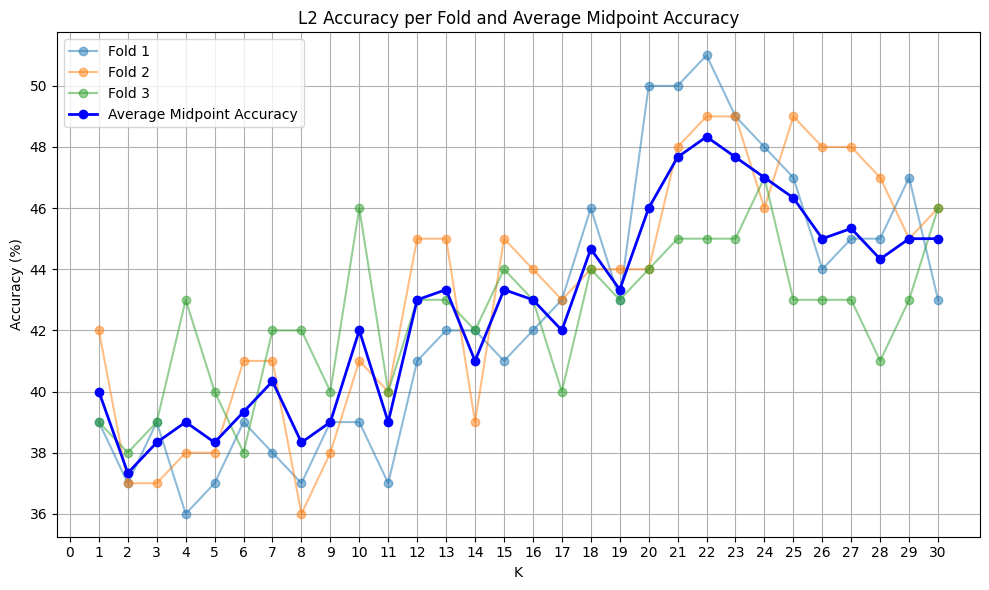

In [40]:
K = np.arange(1, 31)

plt.figure(figsize=(10, 6))

# Plot each fold's accuracy curve
for i, fold_accuracy in enumerate(Folder_accuracies):
    plt.plot(K, fold_accuracy, 'o-', label=f'Fold {i+1}', alpha=0.5)

# Plot the average midpoint accuracy
plt.plot(K, average_midpoints, 'o-', color='blue', label='Average Midpoint Accuracy', linewidth=2)

plt.xlabel('K')
plt.ylabel('Accuracy (%)')
plt.title('L2 Accuracy per Fold and Average Midpoint Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(np.arange(0, 31, 1))
plt.tight_layout()
plt.show()
